## Practical Work 3

For this practical work, the trainees will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

##### Please notice that we will apply these algorithm to single variable LR.
##### Only batch variant is required.

#### Import numpy, matplotlib.pyplot and make it inline

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [ ]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [ ]:
a=-1
b=2
y=a*X+b
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

### Plot X vs. y

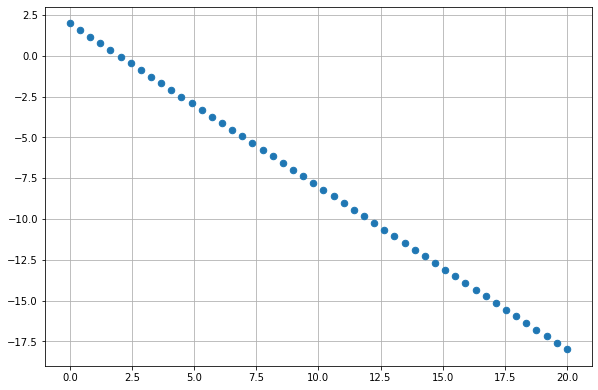

In [ ]:
plt.rcParams['figure.figsize'] = [9.8, 6.6]
plt.plot(X,y," ",marker=".", markersize=13 )
plt.grid(True)

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Choose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)

In [ ]:
def single_gradient_descent( X, y, alpha, iterations=1000, theta_0=0, theta_1=0):
  iter=0
  all_losses=[]
  allthetas_0=[]
  allthetas_1=[]
  all_predicted=[]
  m=X.shape[0]
  for i in range(0,iterations):
    #calculate Y predict
    h_x=theta_0+theta_1*X

    #save y predicted to array
    predicted=np.array(h_x)
    all_predicted.append(predicted)

    #initialize a 1D vecto for loss between y and y predict
    error_vector=np.array(m)
    error_vector_squared=np.array(m)

    # thetas=[theta_0,theta_1]
    allthetas_0.append(theta_0)
    allthetas_1.append(theta_1)

    
    #calculate loss between y and y predict
    error_vector=h_x-y
    error_vector_squared=pow(error_vector,2)

    #calculate cost function
    j=1/(2*m)*np.sum(error_vector_squared)

    #calculate gradient components (derviative for theta0 and theta 1)
    d_theta_0=(1/m)*np.sum(error_vector)
    d_theta_1=((1/m)*np.dot(error_vector.T,X))


    gradient_vector=np.array([[d_theta_0],[d_theta_1]])


    #gradient_norm
    gradient_norm=np.linalg.norm(gradient_vector) 

    print(f"****************** Iteration {i} ********************\n")
    print(f"h(x): {h_x}")
    print(" ")

    print("Error Vector: ")
    print(error_vector)
    print(" ")

    print(f"j = {j}")
    print(" ")

    print(f"Gradient Vector:")
    print(f"{gradient_vector}\n")

    print("Gradient Vector Norm:")
    print(f"{gradient_norm}\n")

    thetas_opt=[]
    diff=0
    if len(all_losses)>=1:
      index=len(all_losses)-1
      diff=all_losses[index]-j
    else: diff=j
    
    if diff<0.001 or gradient_norm<0.001:
      thetas_opt.append([theta_0,theta_1])

      print("****************** Training Report ********************\n")
      print(f"Gradient Descent converged after {i} epochs")
      print(f"theta_0_Opt :{thetas_opt[0][0]}")
      print(f"theta_1_Opt :{thetas_opt[0][1]}")
      print("Error Vector: ")
      print(error_vector)
      print(" ")
      print(f"Cost = {j}")

      print("h(x) = y_predict:")
      print(f"{h_x}\n")
      print("y_actual:")
      print(y)

      #save all data to plot later into arrays
      iter=i+1
      all_predicted=np.array(all_predicted)
      allthetas_0=np.array(allthetas_0)
      allthetas_1=np.array(allthetas_1)
      all_losses.append(j)
      all_losses=np.array(all_losses)
      return thetas_opt,allthetas_0,allthetas_1,all_losses,all_predicted,iter
      break


    #update theta
    theta_0=theta_0-(alpha*d_theta_0)
    theta_1=theta_1-(alpha*d_theta_1)

    print(f"theta_0_new : {theta_0}")
    print(f"theta_1_new : {theta_1}\n")
    all_losses.append(j)
  return allthetas_0,allthetas_1,all_losses,all_predicted,iter

  
  

  


#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [ ]:
gradient=single_gradient_descent(X,y,0.0005,300)

****************** Iteration 0 ********************

h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
 
Error Vector: 
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]
 
j = 49.34693877551021
 
Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

theta_0_new : -0.004
theta_1_new : -0.0573

In [ ]:
from sklearn.metrics import r2_score
r2_score(y,gradient[4][-1])

0.9686158031920962

##### It is recommended to define a function for each plot. This will help you to easly plot the learning curves when you use different values of hyperparameters.

In [ ]:
#plot losses with total epochs
def plt_loss_epoch(loss,epoch):
  plt.rcParams['figure.figsize'] = [9.8, 6.6]
  plt.plot(range(0,epoch),loss,"-m",marker=".",markersize=15)
  plt.ylabel("loss")
  plt.xlabel("Epochs")
  plt.grid()

#plot the loss with all theta_0 values
def plt_loss_theta_0(loss,theta_0,mode="gd",gamma="0.5"):
  plt.plot(theta_0,loss,"-m",marker=".",markersize=15)
  plt.ylabel("loss",fontweight='bold',fontsize=14.0)
  plt.xlabel("Theta 0",fontweight='bold',fontsize=14.0)
  if mode=="gd":
      plt.title("Learning Rate = 0.0005",fontweight='bold',fontsize=14.0)
      plt.grid()
  elif mode=="mgd":
        plt.title(f"Learning Rate = 0.0005 & ɣ={gamma}",fontweight='bold',fontsize=14.0)
        plt.grid()


#plot the loss with all theta_1 values

def plt_loss_theta_1(loss,theta_1,mode="gd",gamma=0.5):
  plt.plot(theta_1,loss,"-m",marker=".",markersize=15)
  plt.ylabel("loss",fontweight='bold',fontsize=14.0)
  plt.xlabel("Theta 1",fontweight='bold',fontsize=14.0)
  if mode=="gd":
      plt.title("Learning Rate = 0.0005",fontweight='bold',fontsize=14.0)
      plt.grid()
  elif mode=="mgd":
     plt.title(f"Learning Rate = 0.0005 & ɣ={gamma}",fontweight='bold',fontsize=14.0)
     plt.grid()



def plt_regression_till_converge(x,y,reg_lines):
  plt.plot(x,y," ",marker=".", markersize=13)
  plt.ylabel("y")
  plt.xlabel("x")
  for pint in reg_lines:
    plt.plot(X,pint,color='r')
  plt.grid()
  plt.legend()


def plt_best_reg_line(x,y,reg_lines):
  plt.plot(X,y," ",marker=".", markersize=13)
  plt.ylabel("y")
  plt.xlabel("x")
  plt.plot(x,reg_lines[-1],color='r')
  plt.grid()
  plt.legend()


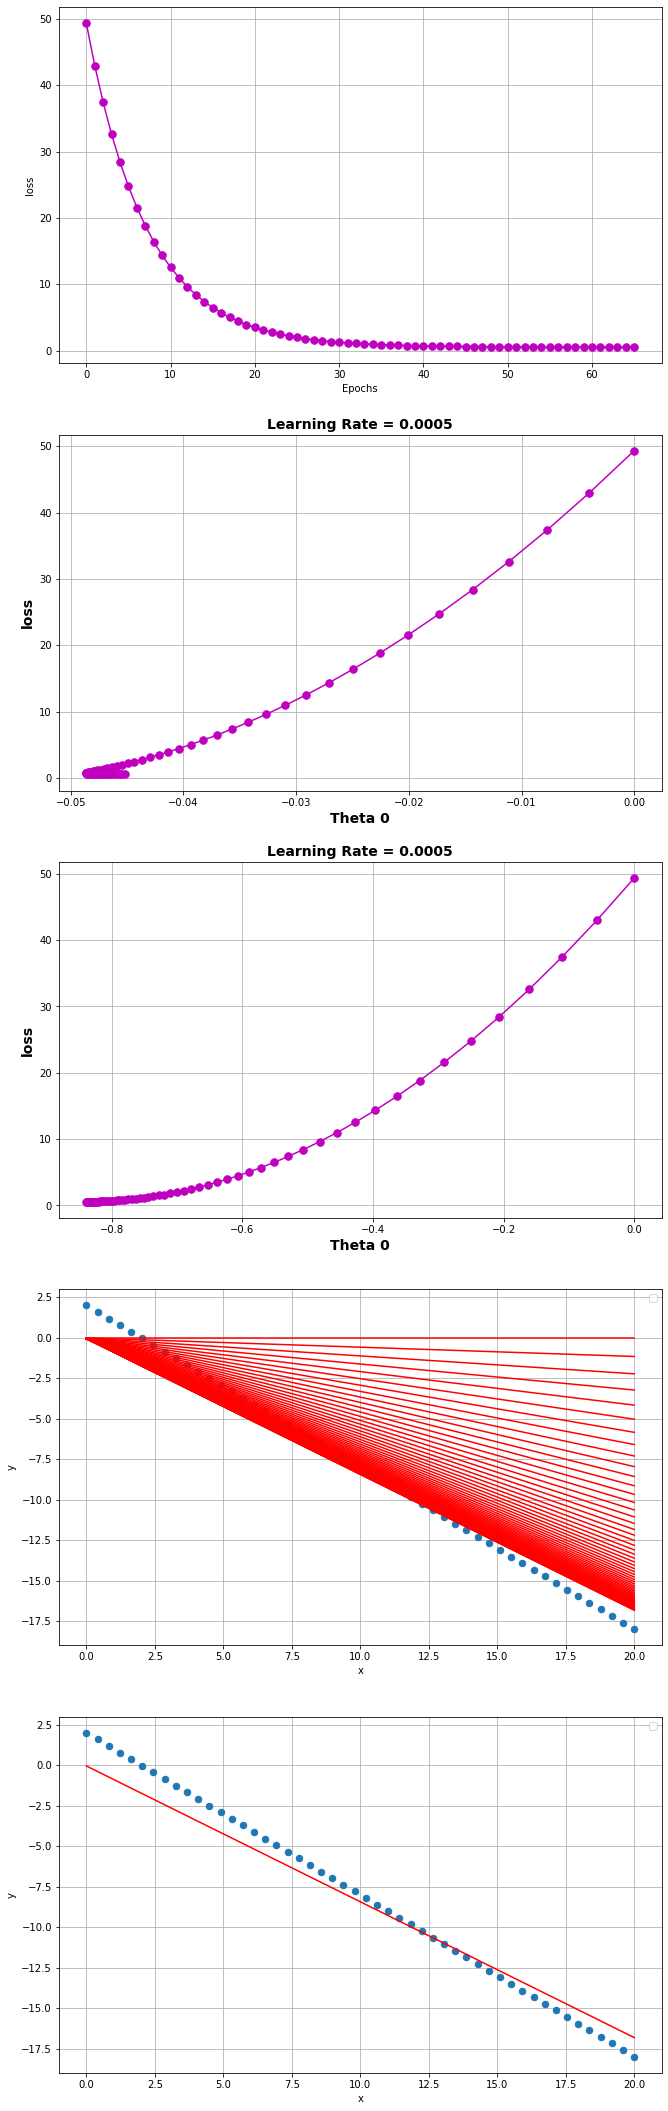

In [ ]:
fig = plt.figure(figsize=(10.8, 38))

fig.add_subplot(5,1,1)
plt_loss_epoch(gradient[3],gradient[5])

fig.add_subplot(5,1,2)
plt_loss_theta_0(gradient[3],gradient[1])

fig.add_subplot(5,1,3)
plt_loss_theta_0(gradient[3],gradient[2])

fig.add_subplot(5,1,4)
plt_regression_till_converge(X,y,gradient[4])

fig.add_subplot(5,1,5)
plt_best_reg_line(X,y,gradient[4])

### Update your Batch GD for single variable  implementation (Batch variant) to be Momentum-Based GD and check your results

#### γ takes values between 0 and 1.

In [ ]:
x=np.linspace(0,20)
x

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [ ]:
a=-1
b=2
y=a*x+b
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005, gamma=0.5 and max. iterations = 300.

In [ ]:
def momentum_gd( X, y, alpha,gamma, iterations=1000, theta_0=0, theta_1=0):
  iter=0
  all_losses=[]
  allthetas_0=[]
  allthetas_1=[]
  all_predicted=[]
  m=X.shape[0]
  vt_theta_0=0
  vt_theta_1=0
  for i in range(0,iterations):
    #calculate Y predict
    h_x=theta_0+theta_1*X

    #save y predicted to array
    predicted=np.array(h_x)
    all_predicted.append(predicted)

    #initialize a 1D vecto for loss between y and y predict
    error_vector=np.array(m)
    error_vector_squared=np.array(m)

    # thetas=[theta_0,theta_1]
    allthetas_0.append(theta_0)
    allthetas_1.append(theta_1)

    
    #calculate loss between y and y predict
    error_vector=h_x-y
    error_vector_squared=pow(error_vector,2)

    #calculate cost function
    j=1/(2*m)*np.sum(error_vector_squared)

    #calculate gradient components (derviative for theta0 and theta 1)
    d_theta_0=(1/m)*np.sum(error_vector)
    d_theta_1=((1/m)*np.dot(error_vector.T,X))


    gradient_vector=np.array([[d_theta_0],[d_theta_1]])


    #gradient_norm
    gradient_norm=np.linalg.norm(gradient_vector) 

    print(f"****************** Iteration {i} ********************\n")
    print(f"h(x): {h_x}")
    print(" ")

    print("Error Vector: ")
    print(error_vector)
    print(" ")

    print(f"j = {j}")
    print(" ")

    print(f"Gradient Vector:")
    print(f"{gradient_vector}\n")

    print("Gradient Vector Norm:")
    print(f"{gradient_norm}\n")

    thetas_opt=[]
    diff=0
    if len(all_losses)>=1:
      index=len(all_losses)-1
      diff=abs(all_losses[index]-j)
    else: diff=j
    
    if diff<0.001 or gradient_norm<0.001:
      thetas_opt.append([theta_0,theta_1])

      print("****************** Training Report ********************\n")
      print(f"Gradient Descent converged after {i} epochs")
      print(f"theta_0_Opt :{thetas_opt[0][0]}")
      print(f"theta_1_Opt :{thetas_opt[0][1]}")
      print("Error Vector: ")
      print(error_vector)
      print(" ")
      print(f"Cost = {j}")

      print("h(x) = y_predict:")
      print(f"{h_x}\n")
      print("y_actual:")
      print(y)

      #save all data to plot later into arrays
      iter=i+1
      all_predicted=np.array(all_predicted)
      allthetas_0=np.array(allthetas_0)
      allthetas_1=np.array(allthetas_1)
      all_losses.append(j)
      all_losses=np.array(all_losses)
      return thetas_opt,allthetas_0,allthetas_1,all_losses,all_predicted,iter
      break


    

    #calculate vt_1
    vt_theta_0=(vt_theta_0*gamma)+(alpha*d_theta_0)
    vt_theta_1=(vt_theta_1*gamma)+(alpha*d_theta_1)

    #update theta
    theta_0=theta_0- vt_theta_0
    theta_1=theta_1- vt_theta_1

    print(f"v_0 : {vt_theta_0}")
    print(f"v_1 : {vt_theta_1}\n")

    print(f"theta_0_new : {theta_0}")
    print(f"theta_1_new : {theta_1}\n")
    all_losses.append(j)
  return allthetas_0,allthetas_1,all_losses,all_predicted,iter

In [ ]:
moment=momentum_gd(x,y,0.0005,0.5,300)

****************** Iteration 0 ********************

h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
 
Error Vector: 
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]
 
j = 49.34693877551021
 
Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

v_0 : 0.004
v_1 : 0.05734693877551021

the

In [ ]:
from sklearn.metrics import r2_score
r2_score(y,moment[4][-1])

0.9687892837396442

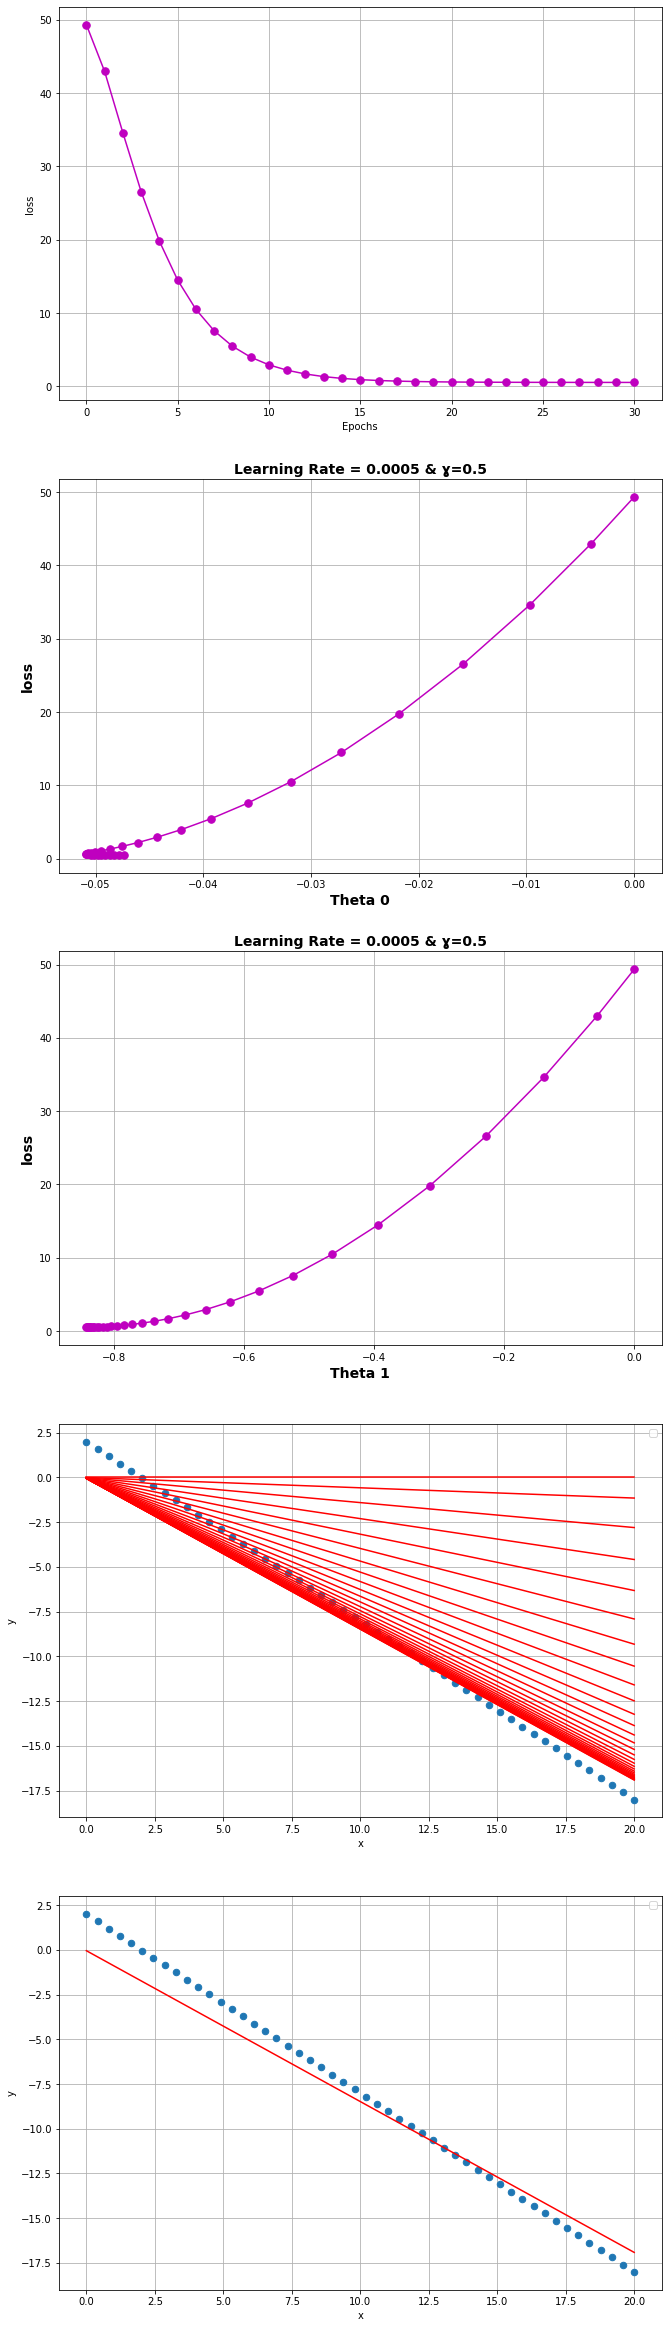

In [ ]:
fig = plt.figure(figsize=(10.8, 42))

fig.add_subplot(5,1,1)
plt_loss_epoch(moment[3],moment[5])

fig.add_subplot(5,1,2)
plt_loss_theta_0(moment[3],moment[1],"mgd",0.5)

fig.add_subplot(5,1,3)
plt_loss_theta_1(moment[3],moment[2],"mgd",0.5)

fig.add_subplot(5,1,4)
plt_regression_till_converge(x,y,moment[4])

fig.add_subplot(5,1,5)
plt_best_reg_line(x,y,moment[4])

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

In [ ]:
gamma=0.9
moment2=momentum_gd(x,y,0.0005,gamma,300)

****************** Iteration 0 ********************

h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
 
Error Vector: 
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]
 
j = 49.34693877551021
 
Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

v_0 : 0.004
v_1 : 0.05734693877551021

the

In [ ]:
from sklearn.metrics import r2_score
r2_score(y,moment2[4][-1])

0.973589591111118

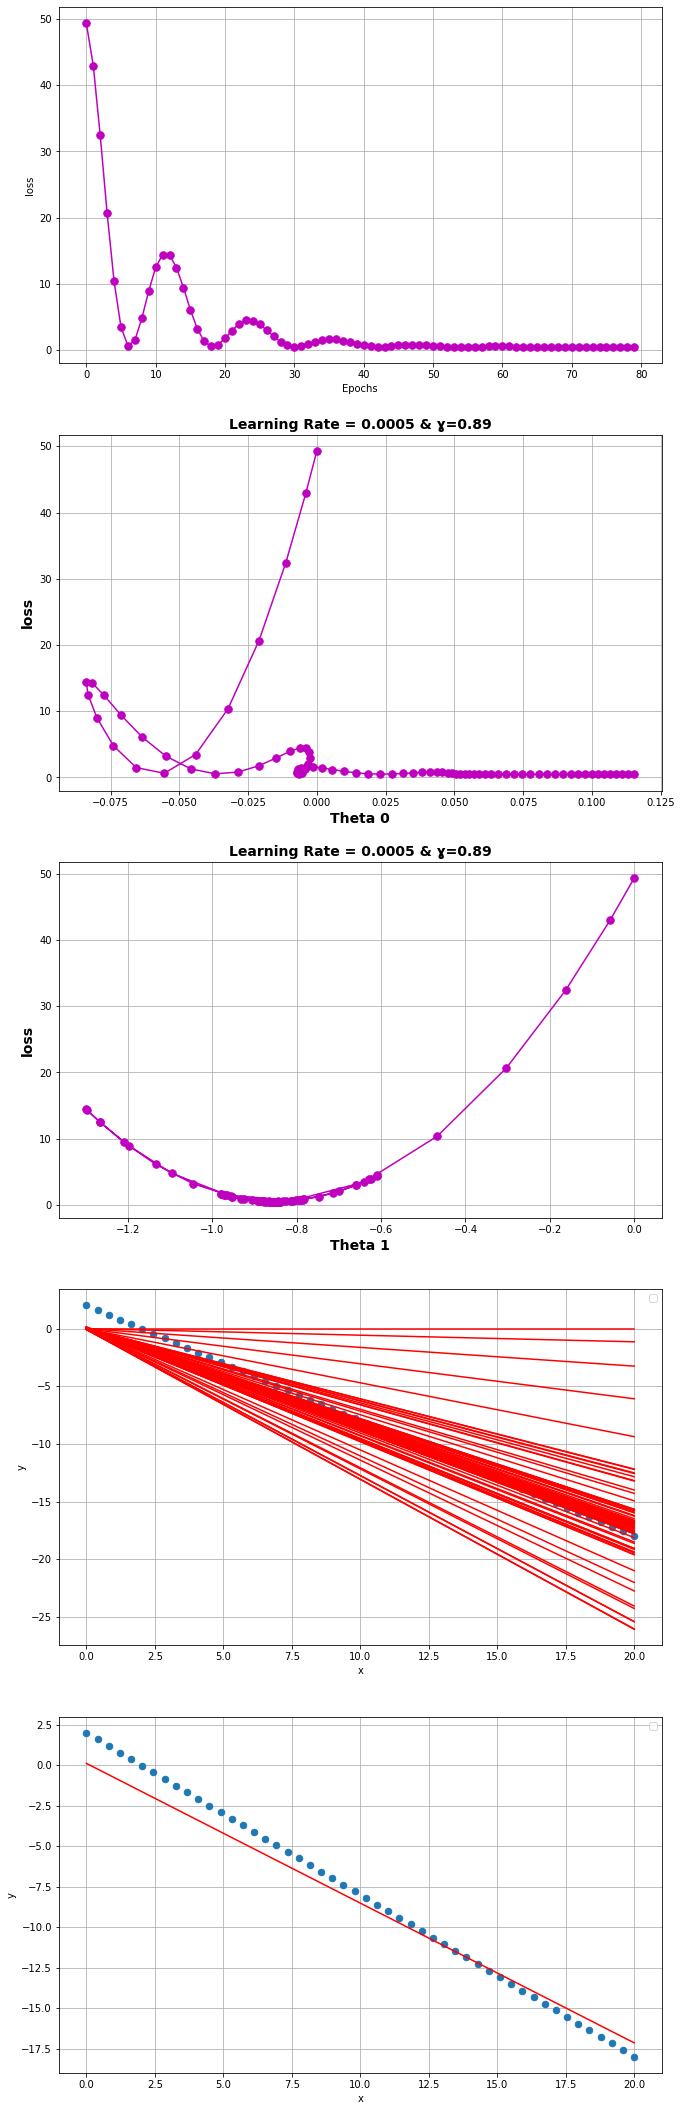

In [ ]:
fig = plt.figure(figsize=(10.8, 38))

fig.add_subplot(5,1,1)
plt_loss_epoch(moment2[3],moment2[5])

fig.add_subplot(5,1,2)
plt_loss_theta_0(moment2[3],moment2[1],"mgd",gamma)

fig.add_subplot(5,1,3)
plt_loss_theta_1(moment2[3],moment2[2],"mgd",gamma)

fig.add_subplot(5,1,4)
plt_regression_till_converge(x,y,moment2[4])

fig.add_subplot(5,1,5)
plt_best_reg_line(x,y,moment2[4])

##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

In [ ]:
gamma=0.89
moment3=momentum_gd(x,y,0.0005,gamma,300)

****************** Iteration 0 ********************

h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
 
Error Vector: 
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]
 
j = 49.34693877551021
 
Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

v_0 : 0.004
v_1 : 0.05734693877551021

the

In [ ]:
from sklearn.metrics import r2_score
r2_score(y,moment3[4][-1])

0.972435565060376

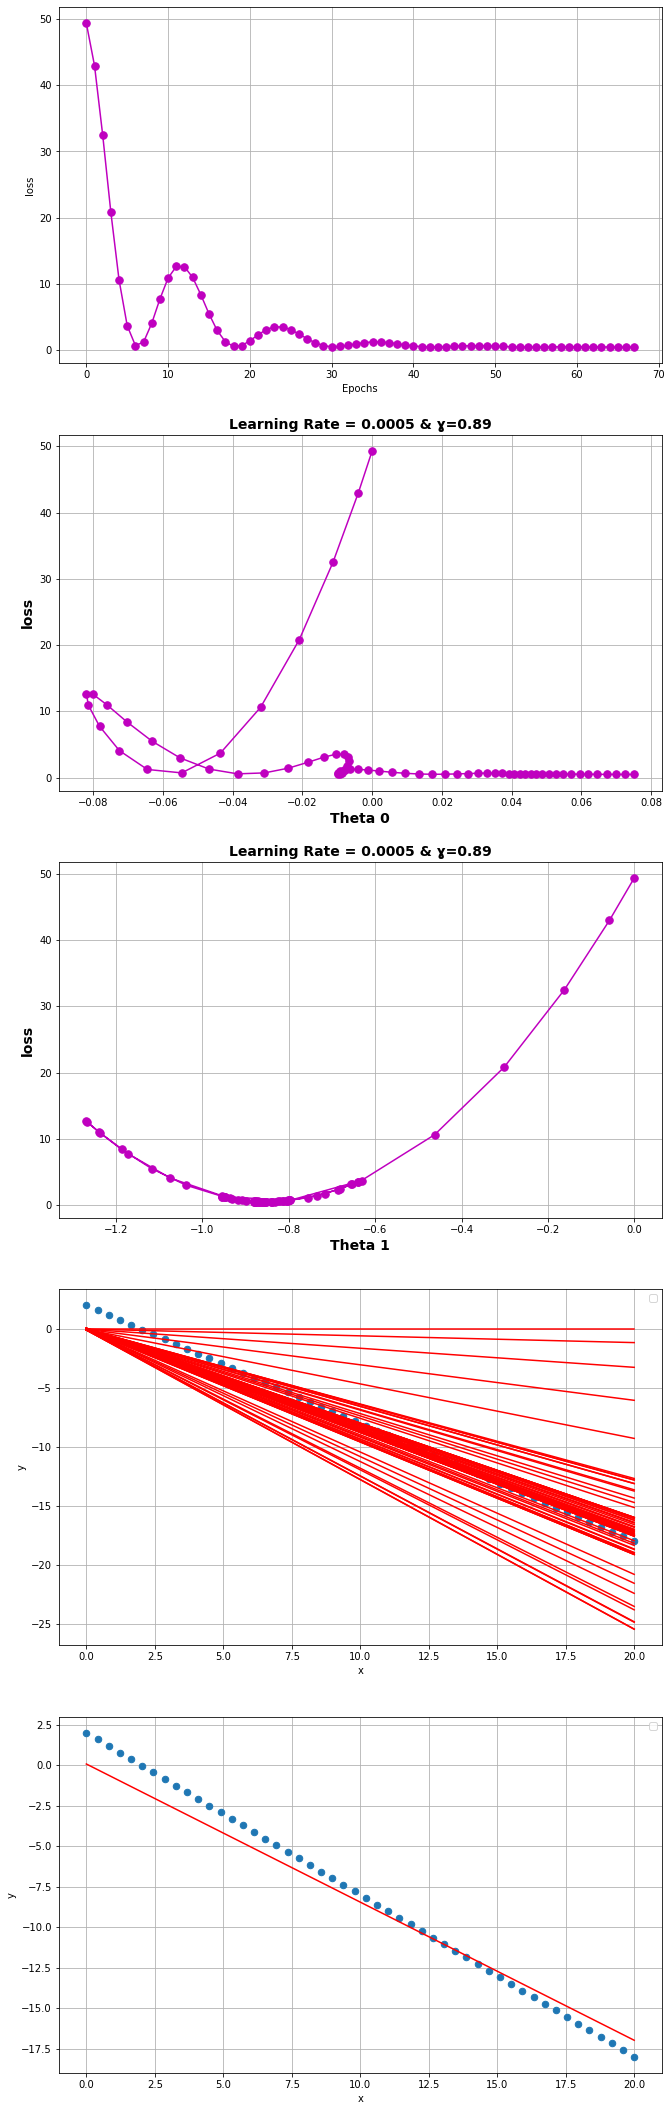

In [ ]:
fig = plt.figure(figsize=(10.8, 38))

fig.add_subplot(5,1,1)
plt_loss_epoch(moment3[3],moment3[5])

fig.add_subplot(5,1,2)
plt_loss_theta_0(moment3[3],moment3[1],"mgd",gamma)

fig.add_subplot(5,1,3)
plt_loss_theta_1(moment3[3],moment3[2],"mgd",gamma)

fig.add_subplot(5,1,4)
plt_regression_till_converge(x,y,moment3[4])

fig.add_subplot(5,1,5)
plt_best_reg_line(x,y,moment3[4])

### Do not forget:

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

In [ ]:
gamma=0
zero=momentum_gd(x,y,0.0005,gamma,300)

****************** Iteration 0 ********************

h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
 
Error Vector: 
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]
 
j = 49.34693877551021
 
Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

v_0 : 0.004
v_1 : 0.05734693877551021

the

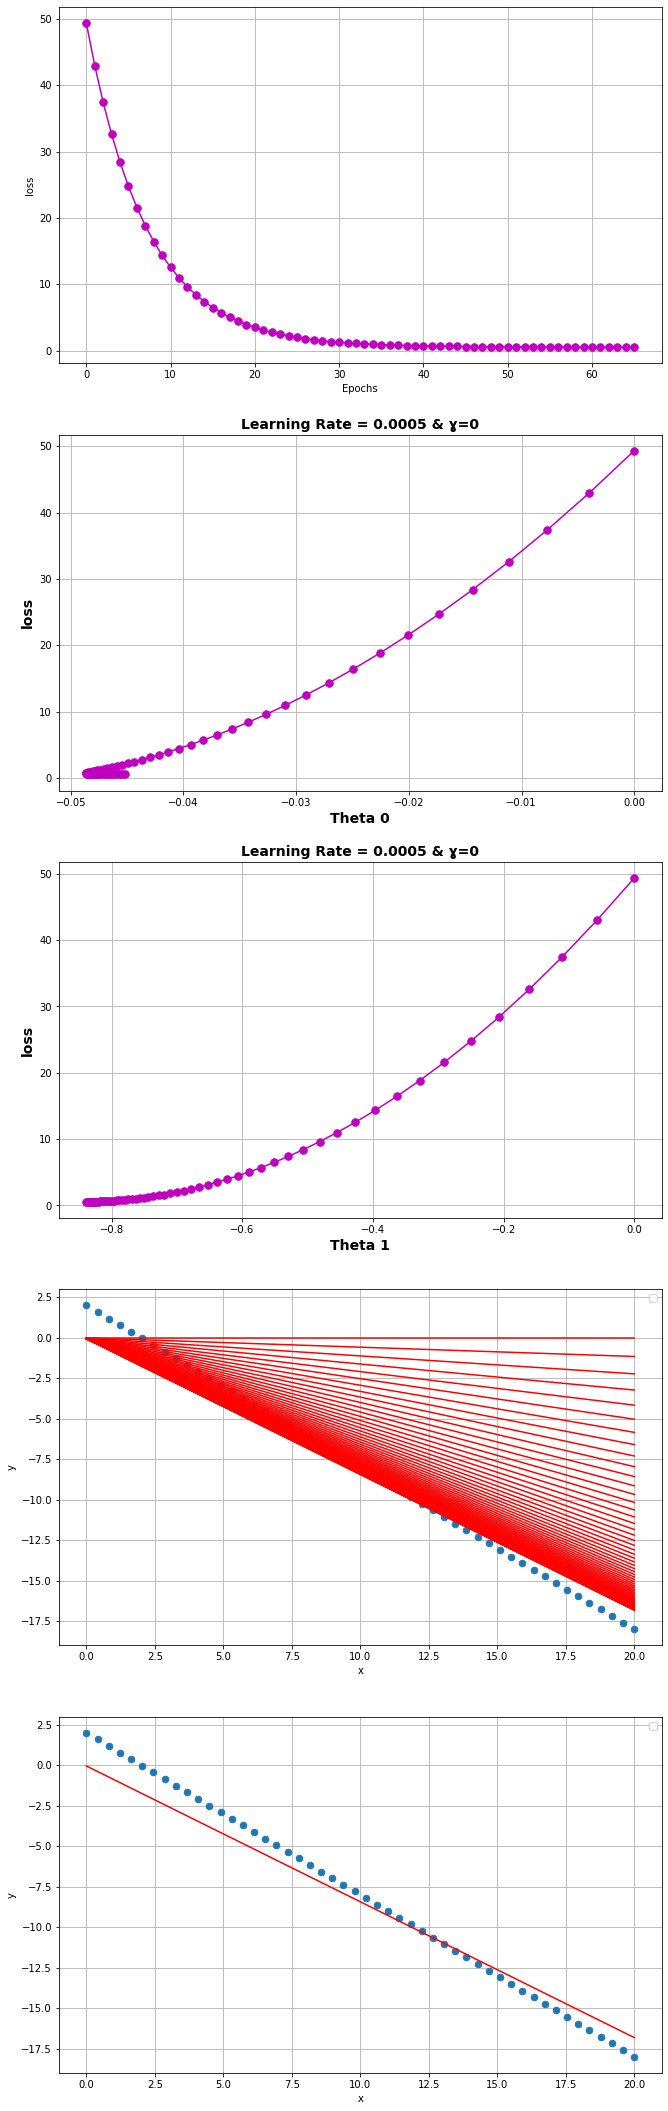

In [ ]:
fig = plt.figure(figsize=(10.8, 38))

fig.add_subplot(5,1,1)
plt_loss_epoch(zero[3],zero[5])

fig.add_subplot(5,1,2)
plt_loss_theta_0(zero[3],zero[1],"mgd",gamma)

fig.add_subplot(5,1,3)
plt_loss_theta_1(zero[3],zero[2],"mgd",gamma)

fig.add_subplot(5,1,4)
plt_regression_till_converge(x,y,zero[4])

fig.add_subplot(5,1,5)
plt_best_reg_line(x,y,zero[4])

### Update your Batch GD for one variable  implementation to be NAG and check your results

##### Very Important:
- <b><font color='red'> In order to calculate the gradient at theta_temp, you will need to calculate the prediction (hypothesis output) using theta_temp. </font></b> 
##### h_temp = theta0_temp + theta1_temp * X 

In [127]:
def nag_gd( X, y, alpha,gamma, iterations=1000, theta_0=0, theta_1=0):
  iter=0
  all_losses=[]
  allthetas_0=[]
  allthetas_1=[]
  all_predicted=[]
  m=X.shape[0]
  vt_theta_0=0
  vt_theta_1=0
  theta_temp_0=0
  theta_temp_1=0

  for i in range(0,iterations):

    #thetas temp
    theta_temp_0=theta_0-(gamma*vt_theta_0)
    theta_temp_1=theta_1-(gamma*vt_theta_1)

    #calculate Y for theta temp predict
    h_temp_x=theta_temp_0+theta_temp_1*X

    
    #calculate y for theta
    h_x=theta_0+theta_1*X

    #save y predicted to array
    predicted=np.array(h_x)
    all_predicted.append(predicted)


    
    #initialize a 1D vecto for loss between y and y predict
    error_vector=np.array(m)
    error_vector_squared=np.array(m)

    # thetas=[theta_0,theta_1]
    allthetas_0.append(theta_0)
    allthetas_1.append(theta_1)

    
    #calculate loss between y and y predict
    error_vector=h_x-y
    error_vector_squared=pow(error_vector,2)

        #calculate loss between y and y predict
    temp_error_vector=h_temp_x-y
    temp_error_vector_squared=pow(temp_error_vector,2)


    #calculate cost function
    j=1/(2*m)*np.sum(error_vector_squared)

    #calculate gradient components (derviative for theta0 and theta 1)
    d_theta_temp_0=(1/m)*np.sum(temp_error_vector)
    d_theta_temp_1=((1/m)*np.dot(temp_error_vector.T,X))


    d_theta_0=(1/m)*np.sum(error_vector)
    d_theta_1=((1/m)*np.dot(error_vector.T,X))


    gradient_vector=np.array([[d_theta_0],[d_theta_1]])


    #gradient_norm
    gradient_norm=np.linalg.norm(gradient_vector) 

    print(f"****************** Iteration {i} ********************\n")
    print(f"h(x): {h_temp_x}")
    print(" ")

    print("Error Vector: ")
    print(error_vector)
    print(" ")

    print(f"j = {j}")
    print(" ")

    print(f"Gradient Vector:")
    print(f"{gradient_vector}\n")

    print("Gradient Vector Norm:")
    print(f"{gradient_norm}\n")

    thetas_opt=[]
    diff=0
    if len(all_losses)>=1:
      index=len(all_losses)-1
      diff=abs(all_losses[index]-j)
    else: diff=j
    
    if diff<0.001 or gradient_norm<0.001:
      thetas_opt.append([theta_temp_0,theta_temp_1])

      print("****************** Training Report ********************\n")
      print(f"Gradient Descent converged after {i} epochs")
      print(f"theta_0_Opt :{thetas_opt[0][0]}")
      print(f"theta_1_Opt :{thetas_opt[0][1]}")
      print("Error Vector: ")
      print(error_vector)
      print(" ")
      print(f"Cost = {j}")

      print("h(x) = y_predict:")
      print(f"{h_temp_x}\n")
      print("y_actual:")
      print(y)

      #save all data to plot later into arrays
      iter=i+1
      all_predicted=np.array(all_predicted)
      allthetas_0=np.array(allthetas_0)
      allthetas_1=np.array(allthetas_1)
      all_losses.append(j)
      all_losses=np.array(all_losses)
      return thetas_opt,allthetas_0,allthetas_1,all_losses,all_predicted,iter
      break


    

    #calculate vt_1
    vt_theta_0=(vt_theta_0*gamma)+(alpha*d_theta_temp_0)
    vt_theta_1=(vt_theta_1*gamma)+(alpha*d_theta_temp_1)

    #update theta
    theta_0=theta_temp_0- (alpha*d_theta_temp_0)
    theta_1=theta_temp_1- (alpha*d_theta_temp_1)

    print(f"v_0 : {vt_theta_0}")
    print(f"v_1 : {vt_theta_1}\n")

    print(f"theta_0_new : {theta_0}")
    print(f"theta_1_new : {theta_1}\n")
    all_losses.append(j)
  return allthetas_0,allthetas_1,all_losses,all_predicted,iter

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

In [128]:
n1=nag_gd(x,y,0.0005,0.9,300)

****************** Iteration 0 ********************

h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
 
Error Vector: 
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]
 
j = 49.34693877551021
 
Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

v_0 : 0.004
v_1 : 0.05734693877551021

the

In [129]:
from sklearn.metrics import r2_score
r2_score(y,n1[4][-1])

0.971103130756324

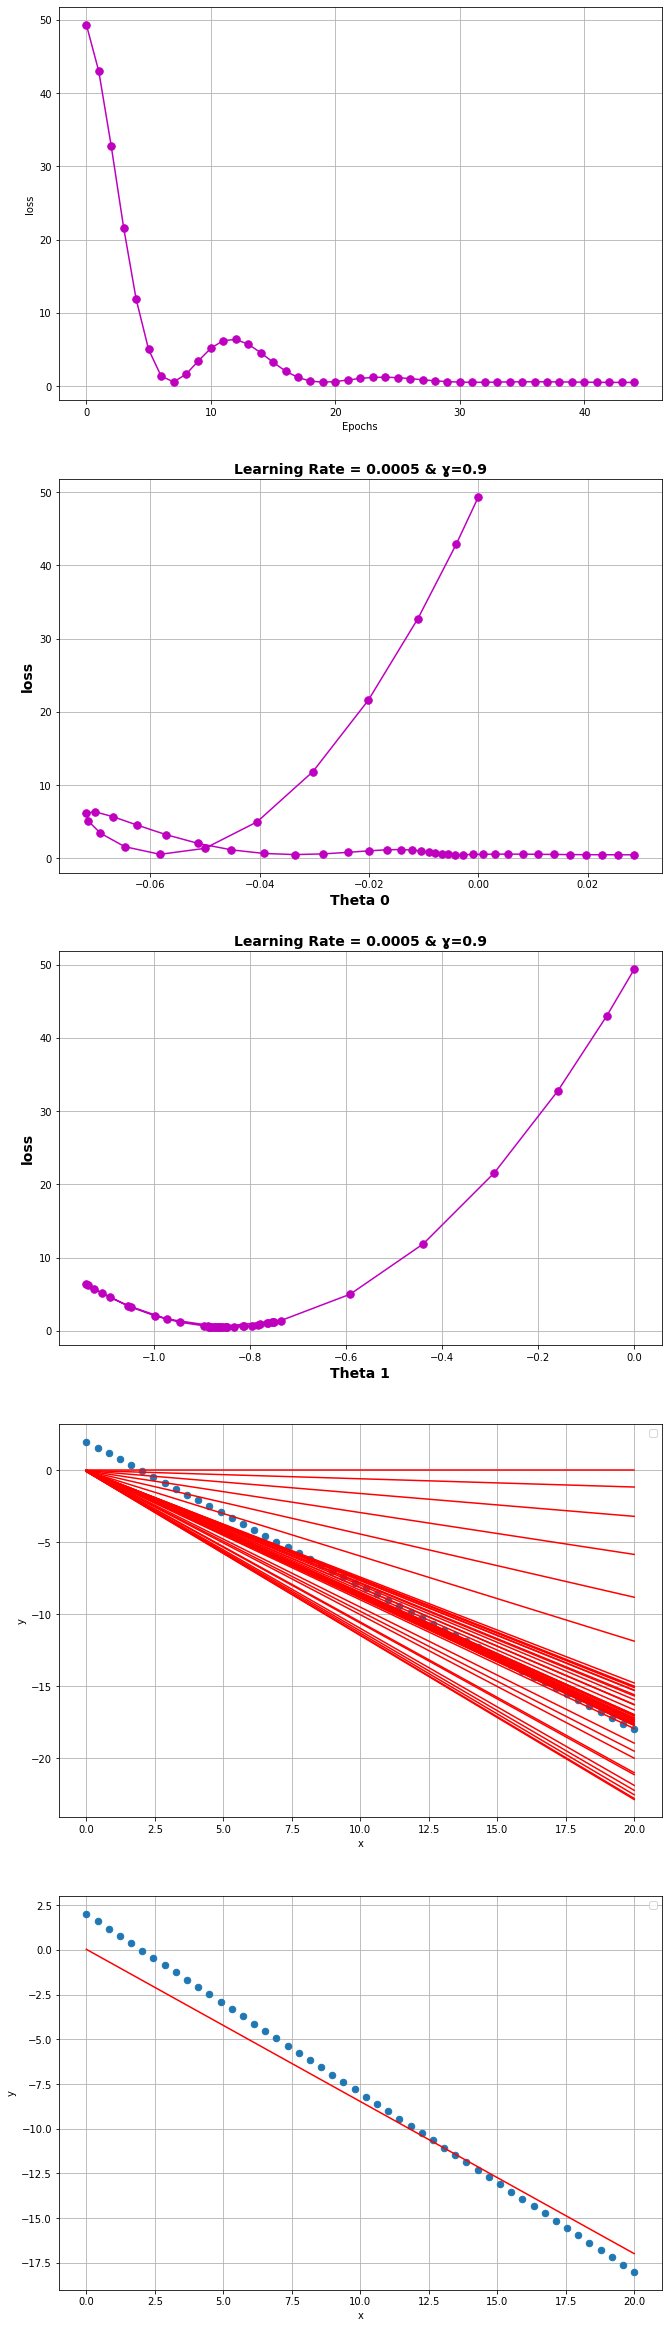

In [133]:

gamma=0.9
fig = plt.figure(figsize=(10.8, 42))

fig.add_subplot(5,1,1)
plt_loss_epoch(n1[3],n1[5])

fig.add_subplot(5,1,2)
plt_loss_theta_0(n1[3],n1[1],"mgd",gamma)

fig.add_subplot(5,1,3)
plt_loss_theta_1(n1[3],n1[2],"mgd",gamma)

fig.add_subplot(5,1,4)
plt_regression_till_converge(x,y,n1[4])

fig.add_subplot(5,1,5)
plt_best_reg_line(x,y,n1[4])

##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

In [134]:
gamma=0.89
n2=nag_gd(x,y,0.0005,gamma,300)

****************** Iteration 0 ********************

h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
 
Error Vector: 
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]
 
j = 49.34693877551021
 
Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

v_0 : 0.004
v_1 : 0.05734693877551021

the

In [135]:
from sklearn.metrics import r2_score
r2_score(y,n2[4][-1])

0.9699718983158406

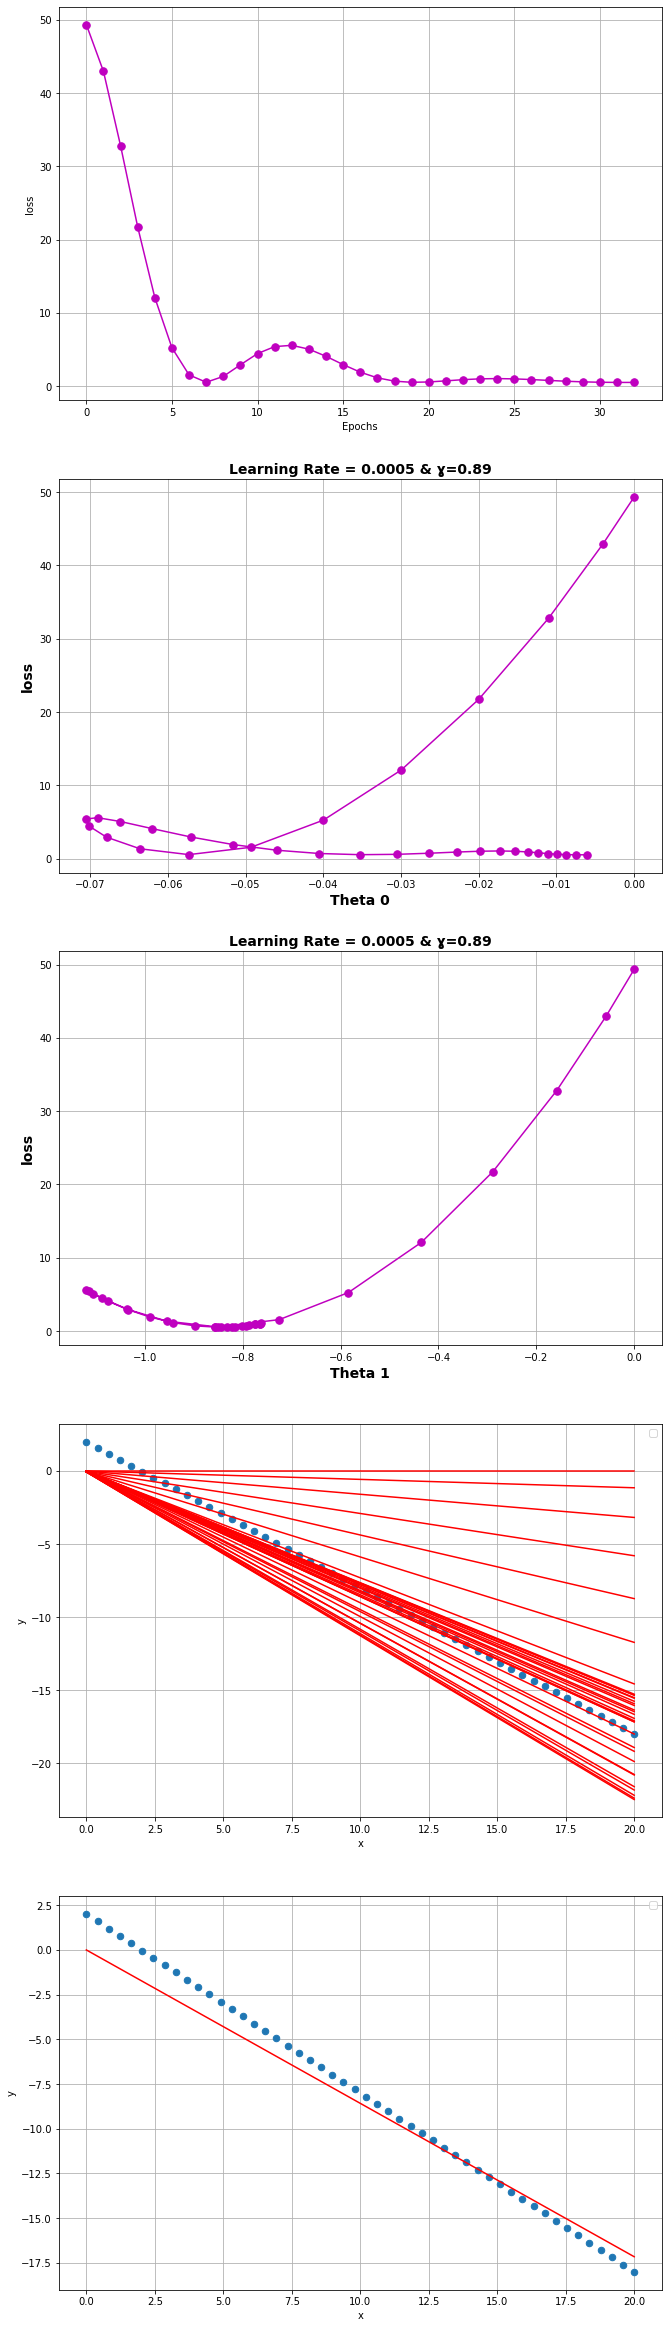

In [136]:
fig = plt.figure(figsize=(10.8, 42))

fig.add_subplot(5,1,1)
plt_loss_epoch(n2[3],n2[5])

fig.add_subplot(5,1,2)
plt_loss_theta_0(n2[3],n2[1],"mgd",gamma)

fig.add_subplot(5,1,3)
plt_loss_theta_1(n2[3],n2[2],"mgd",gamma)

fig.add_subplot(5,1,4)
plt_regression_till_converge(x,y,n2[4])

fig.add_subplot(5,1,5)
plt_best_reg_line(x,y,n2[4])